<a href="https://colab.research.google.com/github/hsantos1985/neural_network/blob/main/APLICACAO_REDE_NEURAL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Redes neurais
####Aplicações para treinamento - 2
####Dataset - Iris



##Formação de modelos de Redes Neurais
####Mudança da formatação da rede
####Aplicação de novas camadas
####Aplicação de novas funções de perda
####Aplicação de nova função de saída

##Bibliotecas

In [1]:
import tensorflow as tf
import keras
from keras.utils import plot_model

from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [18]:
!pip install keras-visualizer

In [19]:
#função para plotagem dos modelos
from keras_visualizer import visualizer
from PIL import Image
def plot_nn(model, setting={}):
    visualizer(model, view=True, file_name='output', file_format='png', settings=setting)
    img = Image.open('output.png')
    return img

##Criação da ABT - Analytical Base Table

In [2]:
iris = datasets.load_iris()

In [6]:
#transforação das colunas - retirada dos espaços
colunas = []

for c in iris.feature_names:
    colunas.append(c.replace(' ', '_').replace('(', '').replace(')', ''))

In [26]:
#criando o df da abt e a coluna target
abt = pd.DataFrame(iris.data, columns=colunas)
abt['target'] = iris.target
abt.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Separação da base de treino e teste



In [27]:
#filtrando os dados com target diferente de 0
abt_filter = abt[abt['target'] !=0 ]


In [28]:
#estabelecendo as variaveis explicativas e  target
X = abt_filter[['petal_length_cm', 'sepal_length_cm']]
y = abt_filter['target']


In [29]:
#estabelecimento das variaveis de treino e teste
#30% de teste e 70% de treino
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
X_test

,petal_length_cm,sepal_length_cm
76,4.8,6.8
136,5.6,6.3
52,4.9,6.9
105,6.6,7.6
125,6.0,7.2
143,5.9,6.8
66,4.5,5.6
123,4.9,6.3
104,5.8,6.5
145,5.2,6.7


#Arquitetura dos modelos

###Modelo 1

In [37]:
#criando a arquitetura do modelo 1
#com 15 neurônios de camada oculta
#função de ativa sigmoid
#função de perda binary crossentropy
#optimizer Adam
#neuroniso de saida de saída 1
model1 = keras.models.Sequential()
model1.add(keras.layers.Input(shape=(2, ), name='camada_entrada'))
model1.add(keras.layers.Dense(10, activation='tanh'))
model1.add(keras.layers.Dense(1, activation='sigmoid', name='camada_saida'))
model1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


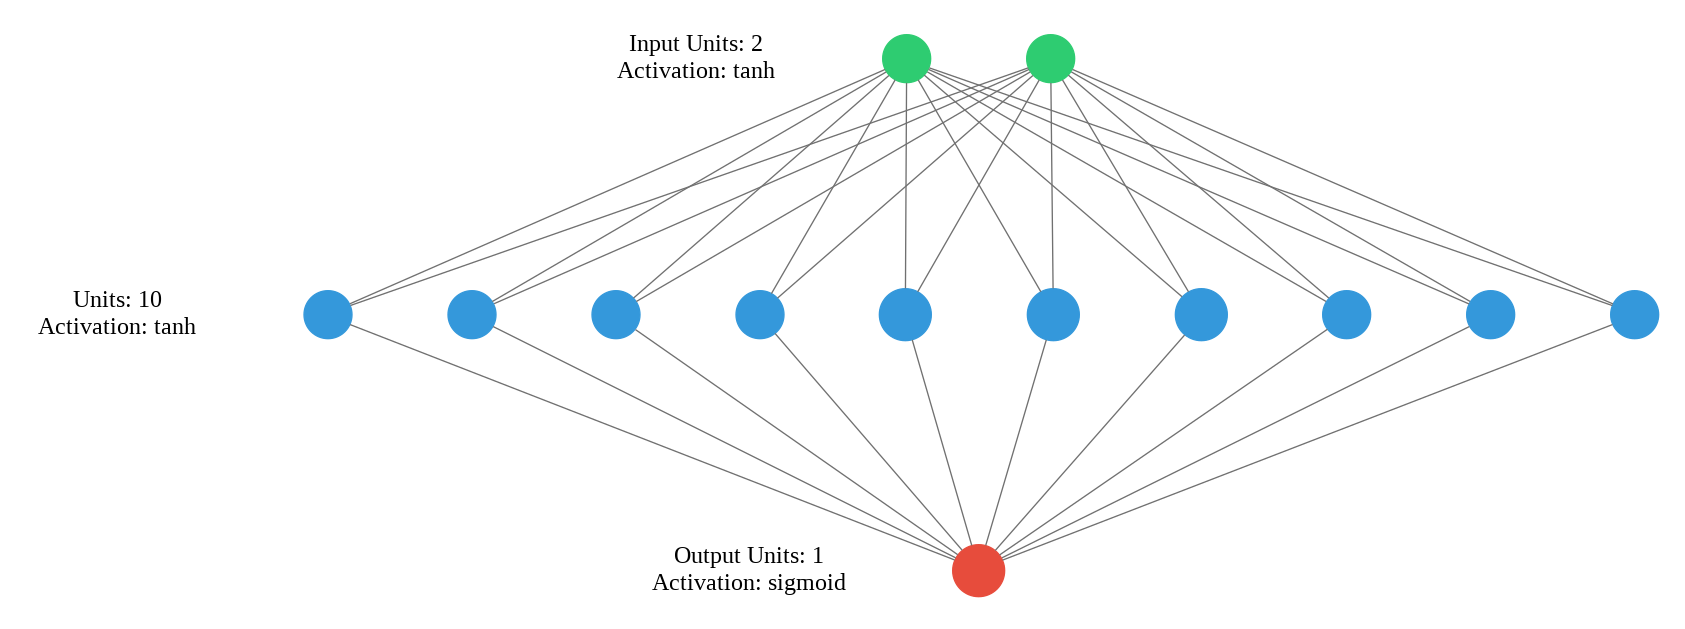

In [38]:
plot_nn(model1)

In [39]:
#fit do modelo nos dados de teste, com 100 epocas
historico1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

Epoch 1/300
3/3 [==============================] - 1s 72ms/step - loss: 2.7853 - accuracy: 0.0000e+00 - val_loss: 2.7222 - val_accuracy: 0.0000e+00
Epoch 2/300
3/3 [==============================] - 0s 14ms/step - loss: 2.7207 - accuracy: 0.0000e+00 - val_loss: 2.6565 - val_accuracy: 0.0000e+00
Epoch 3/300
3/3 [==============================] - 0s 12ms/step - loss: 2.6550 - accuracy: 0.0000e+00 - val_loss: 2.5904 - val_accuracy: 0.0000e+00
Epoch 4/300
3/3 [==============================] - 0s 12ms/step - loss: 2.5879 - accuracy: 0.0000e+00 - val_loss: 2.5237 - val_accuracy: 0.0000e+00
Epoch 5/300
3/3 [==============================] - 0s 12ms/step - loss: 2.5219 - accuracy: 0.0000e+00 - val_loss: 2.4557 - val_accuracy: 0.0000e+00
Epoch 6/300
3/3 [==============================] - 0s 13ms/step - loss: 2.4550 - accuracy: 0.0000e+00 - val_loss: 2.3868 - val_accuracy: 0.0000e+00
Epoch 7/300
3/3 [==============================] - 0s 13ms/step - loss: 2.3857 - accuracy: 0.0000e+00 - val_loss

In [36]:
# acurácia do modelo foi a 50% mesmo com 300 epocas

###Modelo2

In [ ]:
#testando outro modelo com nova arqitetura

In [40]:
#criando a arquitetura do modelo 1
#com 10 neurônios de camada oculta
#com 15 de camada oculta com a função relu
#5 neurônicos de camada ocula na função sigmoid
#função de ativa sigmoid
#função de perda binary crossentropy
#optimizer Adam
#neuroniso de saida de saída 1
model2 = keras.models.Sequential()
model2.add(keras.layers.Input(shape=(2, ), name='camada_entrada'))
model2.add(keras.layers.Dense(10, activation='tanh'))
model2.add(keras.layers.Dense(15, activation='relu'))
model2.add(keras.layers.Dense(5, activation='sigmoid'))
model2.add(keras.layers.Dense(1, activation='sigmoid', name='camada_saida'))
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

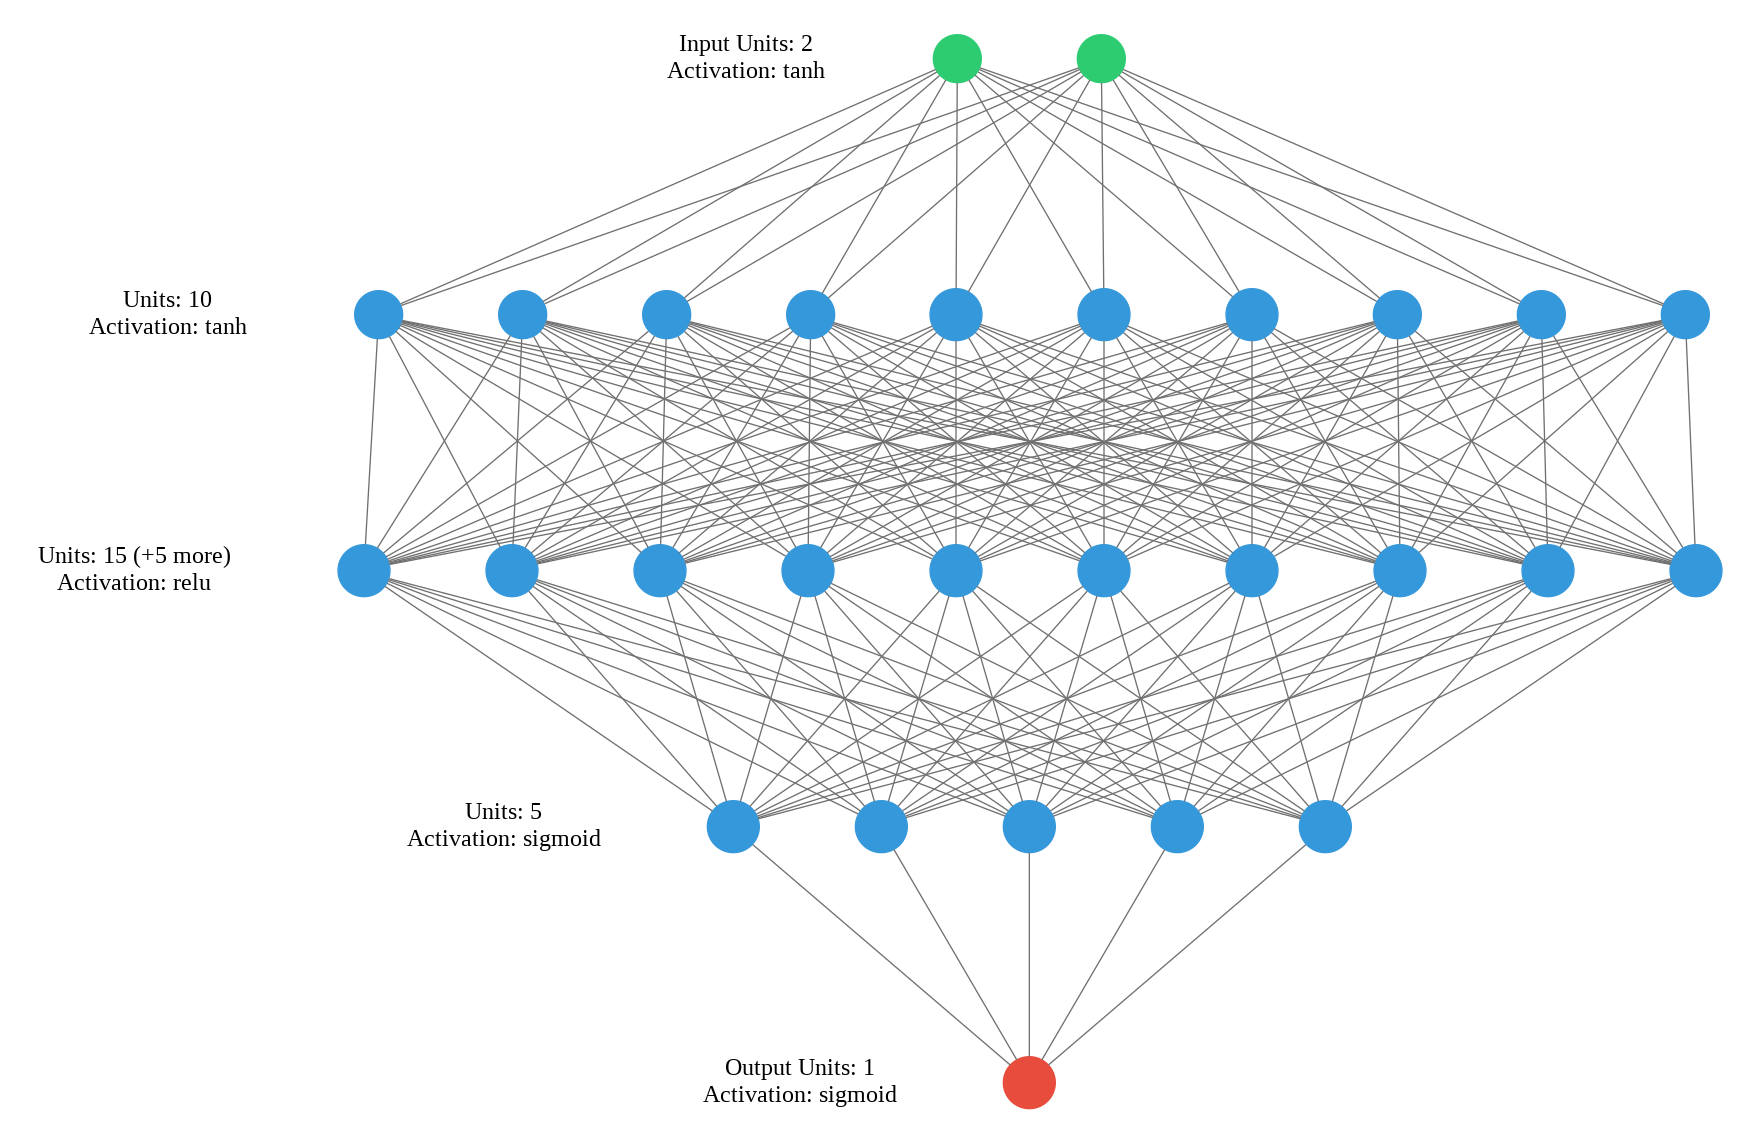

In [41]:
plot_nn(model2)

In [42]:
historico2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300)

Epoch 1/300
3/3 [==============================] - 1s 84ms/step - loss: 0.6104 - accuracy: 0.5000 - val_loss: 0.5900 - val_accuracy: 0.5000
Epoch 2/300
3/3 [==============================] - 0s 14ms/step - loss: 0.5836 - accuracy: 0.5000 - val_loss: 0.5628 - val_accuracy: 0.5000
Epoch 3/300
3/3 [==============================] - 0s 12ms/step - loss: 0.5565 - accuracy: 0.5000 - val_loss: 0.5351 - val_accuracy: 0.5000
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 0.5281 - accuracy: 0.5000 - val_loss: 0.5070 - val_accuracy: 0.5000
Epoch 5/300
3/3 [==============================] - 0s 14ms/step - loss: 0.5007 - accuracy: 0.5000 - val_loss: 0.4786 - val_accuracy: 0.5000
Epoch 6/300
3/3 [==============================] - 0s 12ms/step - loss: 0.4726 - accuracy: 0.5000 - val_loss: 0.4504 - val_accuracy: 0.5000
Epoch 7/300
3/3 [==============================] - 0s 17ms/step - loss: 0.4440 - accuracy: 0.5000 - val_loss: 0.4222 - val_accuracy: 0.5000
Epoch 8/300
3/3 [===

In [43]:
#modelo 2 manteve a mesma acurácia final do modelo 1

##Comparação entre os modelos

###Perda

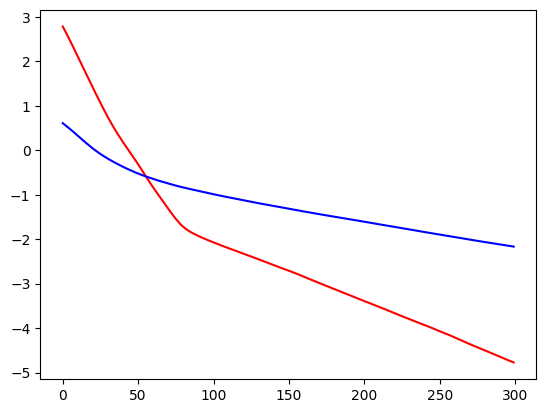

In [44]:
import matplotlib.pyplot as plt
plt.plot(historico1.history['loss'], 'r')
plt.plot(historico2.history['loss'], 'b')

In [ ]:
#O modelo tem perda mais acentuada enquanto o modelo 2 menor

###Acurácia

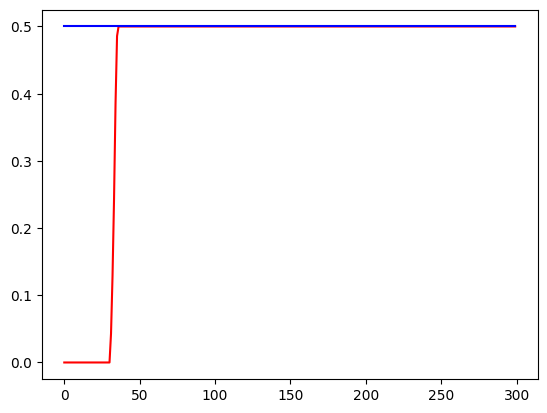

In [45]:
import matplotlib.pyplot as plt
plt.plot(historico1.history['accuracy'], 'r')
plt.plot(historico2.history['accuracy'], 'b')

In [46]:
#o modelo 2 tem a acurácia constante, já o 2 começa no 0 e atinge tabém 0 50%